In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
aksidente = pd.read_csv('dataset\\accident_data.csv')
aksidente

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
aksidente['Accident Date'] = pd.to_datetime(aksidente['Accident Date'], dayfirst = True, errors = 'coerce')

In [4]:
aksidente['Accident Date']

0        2019-06-05
1        2019-07-02
2        2019-08-26
3        2019-08-16
4        2019-09-03
            ...    
660674   2022-02-18
660675   2022-02-21
660676   2022-02-23
660677   2022-02-23
660678   2022-02-28
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

<h1>FILLING OUT NULL VALUES</h1>

In [5]:
aksidente.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>DATA CLEANSING</h1>

In [6]:
aksidente['Latitude'] = aksidente['Latitude'].fillna(aksidente['Latitude'].mode()[0])
aksidente['Longitude'] = aksidente['Longitude'].fillna(aksidente['Longitude'].mode()[0])
aksidente['Road_Surface_Conditions'] = aksidente['Road_Surface_Conditions'].fillna('unknown surface conditions')
aksidente['Road_Type'] = aksidente['Road_Type'].fillna('unaccounted')
aksidente['Urban_or_Rural_Area'] = aksidente['Urban_or_Rural_Area'].fillna(aksidente['Urban_or_Rural_Area'].mode()[0])
aksidente['Weather_Conditions'] = aksidente['Weather_Conditions'].fillna('unaccounted')

In [7]:
aksidente['Latitude'] = aksidente['Latitude'].astype('category')
aksidente['Longitude'] = aksidente['Longitude'].astype('category')
aksidente['Index'] = aksidente['Index'].astype('category')
aksidente['Accident_Severity'] = aksidente['Accident_Severity'].astype('category')
aksidente['Light_Conditions'] = aksidente['Light_Conditions'].astype('category')
aksidente['District Area'] = aksidente['District Area'].astype('category')
aksidente['Road_Surface_Conditions'] = aksidente['Road_Surface_Conditions'].astype('category')
aksidente['Road_Type'] = aksidente['Road_Type'].astype('category')
aksidente['Urban_or_Rural_Area'] = aksidente['Urban_or_Rural_Area'].astype('category')
aksidente['Weather_Conditions'] = aksidente['Weather_Conditions'].astype('category')
aksidente['Vehicle_Type'] = aksidente['Vehicle_Type'].astype('category')

In [8]:
aksidente.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [9]:
aksidente.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting date information using pandas date time</h1>

In [10]:
aksidente['Year'] = aksidente['Accident Date'].dt.year
aksidente['Month'] = aksidente['Accident Date'].dt.month
aksidente['Day'] = aksidente['Accident Date'].dt.day
aksidente['DayOfWeek'] = aksidente['Accident Date'].dt.dayofweek
aksidente

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h1>------------------------------------------------------------</h1><h1 style="background-color: yellow; font-weight:bold;">Additional insights with Continuity<h6>(Aside from the other 20)</h6></h1>

<h4>Data Frame of the accidents in the month of January in the year 2019</h4>

In [11]:
df_2019_1 = aksidente[(aksidente['Year'] == 2019) & (aksidente['Month'] == 1)]
df_2019_1

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
22,200701BS70001,Slight,2019-01-18,51.499983,Darkness - lights lit,Kensington and Chelsea,-0.179933,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,18,4
23,200701BS70002,Serious,2019-01-22,51.485674,Daylight,Kensington and Chelsea,-0.150543,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,22,1
24,200701BS70003,Serious,2019-01-17,51.498157,Daylight,Kensington and Chelsea,-0.201473,1,1,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019,1,17,3
25,200701BS70004,Slight,2019-01-03,51.493311,Darkness - lights lit,Kensington and Chelsea,-0.190427,2,1,Wet or damp,Single carriageway,Urban,Other,Car,2019,1,3,3
26,200701BS70005,Slight,2019-01-02,51.498060,Daylight,Kensington and Chelsea,-0.166178,1,1,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181974,2.01E+12,Slight,2019-01-23,55.197742,Daylight,Dumfries and Galloway,-3.410764,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,23,2
181975,2.01E+12,Serious,2019-01-23,55.332789,Daylight,Dumfries and Galloway,-3.443778,1,1,Wet or damp,Single carriageway,Rural,Snowing no high winds,Car,2019,1,23,2
181976,2.01E+12,Slight,2019-01-28,54.984731,Darkness - no lighting,Dumfries and Galloway,-3.166207,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2019,1,28,0
181977,2.01E+12,Serious,2019-01-28,54.994760,Darkness - no lighting,Dumfries and Galloway,-3.224804,1,1,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,1,28,0


In [12]:
# accident severity among different areas
fatality= aksidente.groupby(['District Area','Accident_Severity'])['Number_of_Casualties'].size()
fatality.unstack()

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


In [13]:
f_accident= aksidente.groupby(['Accident Date','Accident_Severity'])['Number_of_Casualties'].count()
f_accident

Accident Date  Accident_Severity
2019-01-01     Fatal                 11
               Serious               53
               Slight               271
2019-01-02     Fatal                  6
               Serious               57
                                   ... 
2022-12-30     Serious               21
               Slight               150
2022-12-31     Fatal                  4
               Serious               24
               Slight               165
Name: Number_of_Casualties, Length: 4383, dtype: int64

In [14]:
aksidente.describe().T
aksidente.groupby(['Accident_Severity','Vehicle_Type'])['Number_of_Casualties'].describe().T.head()

Accident_Severity                Fatal                                       \
Vehicle_Type      Agricultural vehicle Bus or coach (17 or more pass seats)   
count                        21.000000                           325.000000   
mean                          1.761905                             2.101538   
std                           1.044259                             3.618219   
min                           1.000000                             1.000000   
25%                           1.000000                             1.000000   

Accident_Severity                                             \
Vehicle_Type               Car Goods 7.5 tonnes mgw and over   
count              6577.000000                     216.00000   
mean                  1.891744                       1.87500   
std                   1.776131                       1.74892   
min                   1.000000                       1.00000   
25%                   1.000000                       1.00000   

Accident_Severity                                  \
Vehicle_Type      Goods over 3.5t. and under 7.5t   
count                                   67.000000   
mean                                     2.164179   
std                                      2.711351   
min                                      1.000000   
25%                                      1.000000   

Accident_Severity                                                              \
Vehicle_Type      Minibus (8 - 16 passenger seats) Motorcycle 125cc and under   
count                                    29.000000                 189.000000   
mean                                      2.517241                   1.767196   
std                                       2.339424                   1.166365   
min                                       1.000000                   1.000000   
25%                                       1.000000                   1.000000   

Accident_Severity                            \
Vehicle_Type      Motorcycle 50cc and under   
count                             95.000000   
mean                               1.726316   
std                                1.170943   
min                                1.000000   
25%                                1.000000   

Accident_Severity                                                              \
Vehicle_Type      Motorcycle over 125cc and up to 500cc Motorcycle over 500cc   
count                                        105.000000            339.000000   
mean                                           1.809524              1.793510   
std                                            1.233314              1.379848   
min                                            1.000000              1.000000   
25%                                            1.000000              1.000000   

Accident_Severity  ...                           Slight  \
Vehicle_Type       ... Minibus (8 - 16 passenger seats)   
count              ...                      1671.000000   
mean               ...                         1.323160   
std                ...                         0.724876   
min                ...                         1.000000   
25%                ...                         1.000000   

Accident_Severity                                                       \
Vehicle_Type      Motorcycle 125cc and under Motorcycle 50cc and under   
count                           13049.000000               6494.000000   
mean                                1.308836                  1.320450   
std                                 0.728955                  0.714651   
min                                 1.000000                  1.000000   
25%                                 1.000000                  1.000000   

Accident_Severity                                                              \
Vehicle_Type      Motorcycle over 125cc and up to 500cc Motorcycle over 500cc   
count                                       6537.000000         

In [15]:
aksidente.groupby(['Accident_Severity','Vehicle_Type'])['Number_of_Casualties'].agg(['count', 'mean', 'max'])

count      mean  \
Accident_Severity Vehicle_Type                                              
Fatal             Agricultural vehicle                       21  1.761905   
                  Bus or coach (17 or more pass seats)      325  2.101538   
                  Car                                      6577  1.891744   
                  Data missing or out of range                0       NaN   
                  Goods 7.5 tonnes mgw and over             216  1.875000   
                  Goods over 3.5t. and under 7.5t            67  2.164179   
                  Minibus (8 - 16 passenger seats)           29  2.517241   
                  Motorcycle 125cc and under                189  1.767196   
                  Motorcycle 50cc and under                  95  1.726316   
                  Motorcycle over 125cc and up to 500cc     105  1.809524   
                  Motorcycle over 500cc                     339  1.793510   
                  Other vehicle                              70  1.657143   
                  Pedal cycle                                 6  1.666667   
                  Ridden horse                                0       NaN   
                  Taxi/Private hire car                     155  1.987097   
                  Van / Goods 3.5 tonnes mgw or under       467  2.072805   
Serious           Agricultural vehicle                      282  1.475177   
                  Bus or coach (17 or more pass seats)     3373  1.471687   
                  Car                                     66461  1.469855   
                  Data missing or out of range                0       NaN   
                  Goods 7.5 tonnes mgw and over            2321  1.443774   
                  Goods over 3.5t. and under 7.5t           857  1.526254   
                  Minibus (8 - 16 passenger seats)          276  1.358696   
                  Motorcycle 125cc and under               2031  1.445101   
                  Motorcycle 50cc and under                1014  1.408284   
                  Motorcycle over 125cc and up to 500cc    1014  1.434911   
                  Motorcycle over 500cc                    3457  1.449523   
                  Other vehicle                             767  1.487614   
                  Pedal cycle                                39  1.256410   
                  Ridden horse                                0       NaN   
                  Taxi/Private hire car                    1771  1.488989   
                  Van / Goods 3.5 tonnes mgw or under      4554  1.467062   
Slight            Agricultural vehicle                     1644  1.313869   
                  Bus or coach (17 or more pass seats)    22180  1.319567   
                  Car                                    424954  1.333231   
                  Data missing or out of range                6  1.500000   
                  Goods 7.5 tonnes mgw and over           14770  1.329790   
                  Goods over 3.5t. and under 7.5t          5172  1.325406   
                  Minibus (8 - 16 passenger seats)         1671  1.323160   
                  Motorcycle 125cc and under              13049  1.308836   
                  Motorcycle 50cc and under                6494  1.320450   
                  Motorcycle over 125cc and up to 500cc    6537  1.321860   
                  Motorcycle over 500cc                   21861  1.338457   
                  Other vehicle                            4800  1.311875   
                  Pedal cycle                               152  1.388158   
                  Ridden horse                                4  1.250000   
                  Taxi/Private hire car                   11368  1.341485   
                  Van / Goods 3.5 tonnes mgw or under     29139  1.325440   

                                                          max  
Accident_Severity Vehicle_Type                                 
Fatal             Agricultural vehicle                    4.0  
               

<h1 style="font-weight:bold;">Univariate Analysis</h1>
<h1>What could be the light condition that has the most number of accidents in the first month of 2019?</h1>
<h4>majority of the accident happens on broad daylight. About 54.75% of the total accidents on January 2019 happened during Daylight</h4>

In [16]:
print(f"The total number of accident in the first month of 2019 is {df_2019_1 ['Light_Conditions'].value_counts().sum()}")
df_2019_1 ['Light_Conditions'].value_counts()

The total number of accident in the first month of 2019 is 15355


Light_Conditions
Daylight                       8407
Darkness - lights lit          5031
Darkness - no lighting         1585
Darkness - lighting unknown     248
Darkness - lights unlit          84
Name: count, dtype: int64

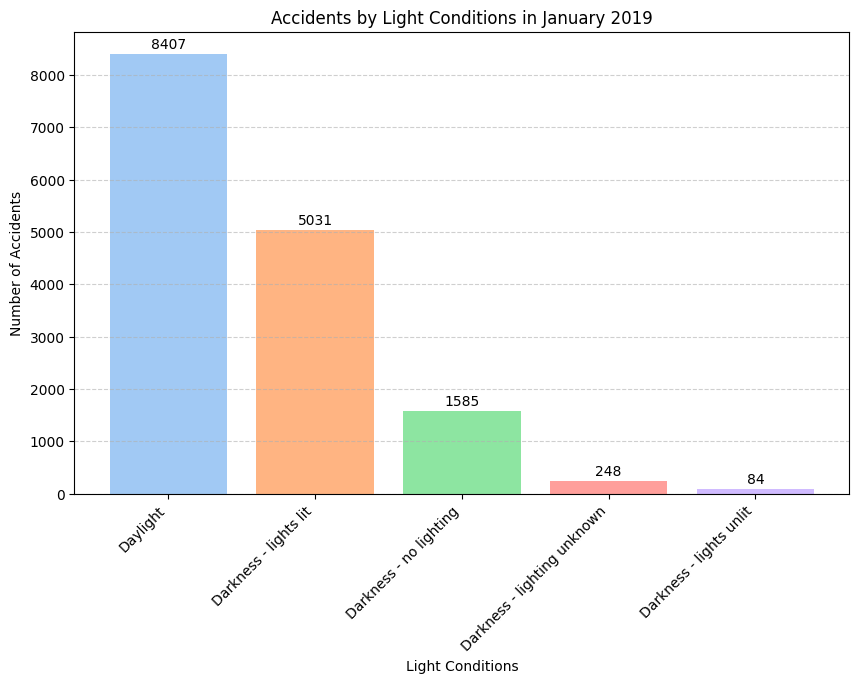

In [17]:
# Bar Chart: Accidents by Light Conditions in January 2019
light_conditions = df_2019_1['Light_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(light_conditions.index, light_conditions.values, color=sns.color_palette('pastel'))
plt.title('Accidents by Light Conditions in January 2019')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, value in enumerate(light_conditions.values):
    plt.text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=10)

plt.show()

In [18]:
# Percentage Calculator Formula
v = ( df_2019_1 ['Light_Conditions'].value_counts().max() / df_2019_1 ['Light_Conditions'].value_counts().sum() ) * 100
np.round(v,2)

54.75

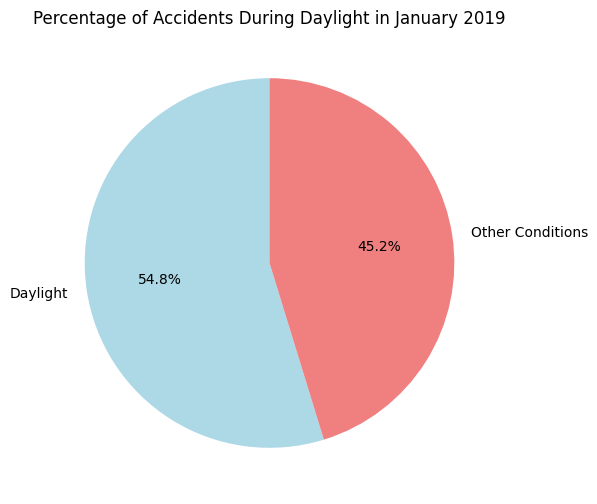

In [19]:
# Pie Chart: Percentage of Accidents During Daylight in January 2019
daylight_count = df_2019_1['Light_Conditions'].value_counts()['Daylight']
other_count = df_2019_1['Light_Conditions'].value_counts().sum() - daylight_count

plt.figure(figsize=(6, 6))
plt.pie([daylight_count, other_count], labels=['Daylight', 'Other Conditions'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Percentage of Accidents During Daylight in January 2019')
plt.show()

<h1>Does Year and Number of Casualties have correlation with one another?</h1><h4>Year does not have correlation with any number of casualties</h4>

In [20]:
correl = aksidente['Year'].corr(aksidente['Number_of_Casualties']) > 0.5
print(f"Year does not have any correlation with the number of casualties ({aksidente['Year'].corr(aksidente['Number_of_Casualties'])})")
correl

Year does not have any correlation with the number of casualties (-0.001549810694958303)


False

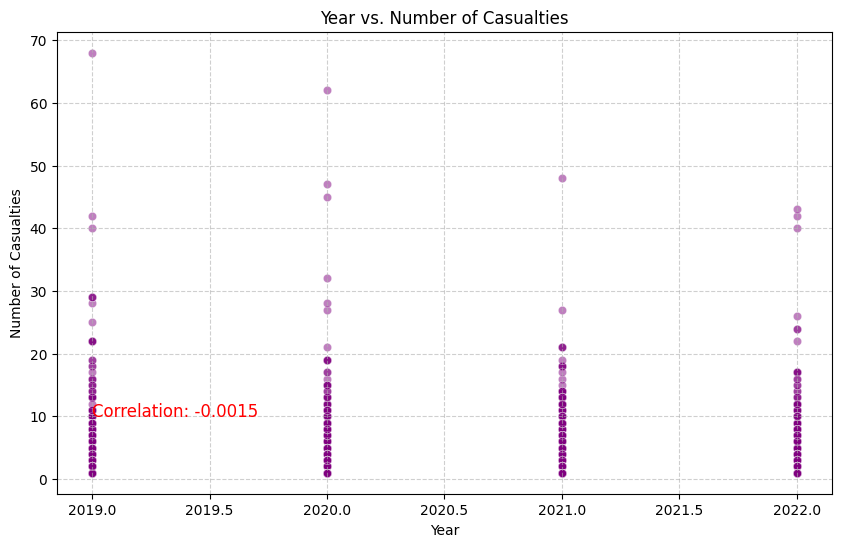

In [21]:
# Scatter Plot: Year vs. Number of Casualties
plt.figure(figsize=(10, 6))
sns.scatterplot(x=aksidente['Year'], y=aksidente['Number_of_Casualties'], alpha=0.5, color='purple')
plt.title('Year vs. Number of Casualties')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.grid(True, linestyle='--', alpha=0.6)

plt.text(2019, 10, f'Correlation: {aksidente["Year"].corr(aksidente["Number_of_Casualties"]):.4f}', fontsize=12, color='red')

plt.show()

<h1 style="font-weight:bold;">Bivariate Analysis with Continuity</h1><h4>Data Frame of the accidents in the district area of Kensington and Chelsea in Daylight conditions</h4>

In [22]:
df_ken_day = aksidente[(aksidente['Light_Conditions'] == 'Daylight') & (aksidente['District Area'] == 'Kensington and Chelsea')]
df_ken_day

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,9,5,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532829,201001TB00417,Serious,2022-07-23,51.491188,Daylight,Kensington and Chelsea,-0.186910,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,7,23,5
532927,201001TB00557,Slight,2022-08-01,51.502044,Daylight,Kensington and Chelsea,-0.191090,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,8,1,0
533039,201001TB00720,Serious,2022-10-15,51.526104,Daylight,Kensington and Chelsea,-0.211905,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,15,5
533316,201001TE00005,Serious,2022-01-17,51.520998,Daylight,Kensington and Chelsea,-0.213258,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,1,17,0



<h1>How many casualties are involved in daylight conditions under the area of Keningston and Chelsea</h1>
<h4>There are 1989 casualties involved in daylight conditions under the area of Keningston and Chelsea</h4>

In [23]:
df_ken_day['Number_of_Casualties'].count()

1989

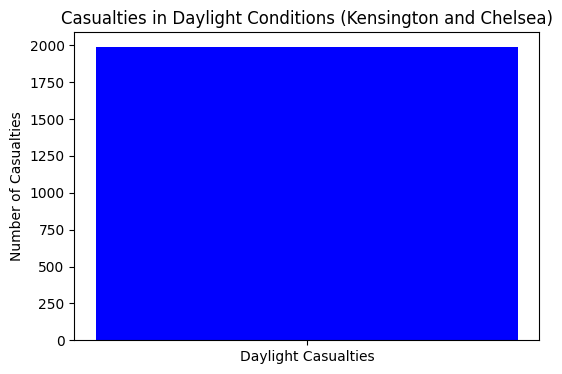

In [24]:
# Bar Chart: Casualties in Daylight Conditions in Kensington and Chelsea
plt.figure(figsize=(6, 4))
plt.bar(['Daylight Casualties'], [df_ken_day['Number_of_Casualties'].count()], color='blue')
plt.title('Casualties in Daylight Conditions (Kensington and Chelsea)')
plt.ylabel('Number of Casualties')
plt.show()

<h1> What type of accident severity is the most dominant in daylight conditions under the area of Keningston and Chelsea </h1><h4>The majority of accidents are slight 86.93% (1729), followed by serious 12.47% (248) and fatal 0.6% (12)</h4>

In [25]:
sum_of_all_accidents = (df_ken_day[df_ken_day['Accident_Severity'] == 'Slight'].count().mean() + df_ken_day[df_ken_day['Accident_Severity'] == 'Serious'].count().mean() + df_ken_day[df_ken_day['Accident_Severity'] == 'Fatal'].count().mean())
percentage_slight = np.round(((df_ken_day[df_ken_day['Accident_Severity'] == 'Slight'].count().mean() / sum_of_all_accidents) * 100),2)
percentage_serious = np.round(((df_ken_day[df_ken_day['Accident_Severity'] == 'Serious'].count().mean() / sum_of_all_accidents) * 100),2)
percentage_fatal = np.round(((df_ken_day[df_ken_day['Accident_Severity'] == 'Fatal'].count().mean() / sum_of_all_accidents) * 100),2)
print(f"The majority of accidents are slight {percentage_slight}%, followed by serious {percentage_serious}%, and fatal {percentage_fatal}%")
df_ken_day['Accident_Severity'].value_counts()


The majority of accidents are slight 86.93%, followed by serious 12.47%, and fatal 0.6%


Accident_Severity
Slight     1729
Serious     248
Fatal        12
Name: count, dtype: int64

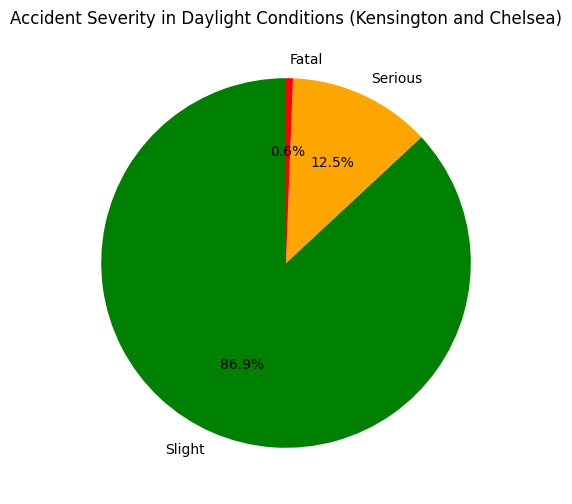

In [26]:
# Pie Chart: Accident Severity in Daylight Conditions (Kensington and Chelsea)
severity_counts = df_ken_day['Accident_Severity'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
plt.title('Accident Severity in Daylight Conditions (Kensington and Chelsea)')
plt.show()

<h1> Is there a correlation between the number of vehicles and number of casualties in the area of Keningston and Chelsea under daylight conditions? </h1><h4>There is no correlation between the number of vehicles and number of casualties (0.09)</h4>

In [27]:
df_ken_day['Number_of_Vehicles'].corr(df_ken_day['Number_of_Casualties']) > 0.5
print(f"There is no correlation between the number of vehicles and number of casualties {np.round(df_ken_day['Number_of_Vehicles'].corr(df_ken_day['Number_of_Casualties']),2)}")

There is no correlation between the number of vehicles and number of casualties 0.09


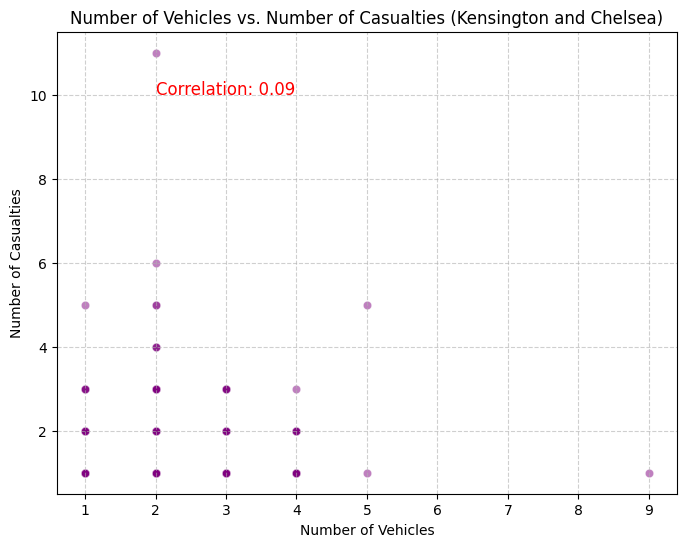

In [28]:
# Scatter Plot: Number of Vehicles vs. Number of Casualties
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_ken_day['Number_of_Vehicles'], y=df_ken_day['Number_of_Casualties'], alpha=0.5, color='purple')
plt.title('Number of Vehicles vs. Number of Casualties (Kensington and Chelsea)')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.grid(True, linestyle='--', alpha=0.6)

plt.text(2, 10, f'Correlation: {df_ken_day["Number_of_Vehicles"].corr(df_ken_day["Number_of_Casualties"]):.2f}', fontsize=12, color='red')

plt.show()

<h1> Are casualties greater in Sundays than Saturdays?</h1><h4>It appears that casualties are greater in Sundays than Saturdays</h4>

In [29]:
saturday_accidents = aksidente[(aksidente['DayOfWeek'] == 5)]['Number_of_Casualties']
sunday_accidents = aksidente[(aksidente['DayOfWeek'] == 6)]['Number_of_Casualties']

saturday_accidents.mean() < sunday_accidents.mean()

True

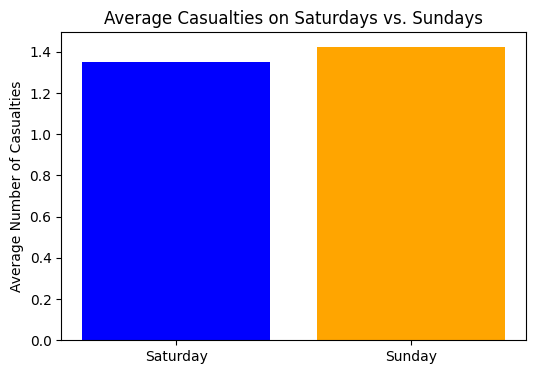

In [30]:
# Bar Chart: Casualties on Sundays vs. Saturdays
days = ['Saturday', 'Sunday']
casualties = [saturday_accidents.mean(), sunday_accidents.mean()]

plt.figure(figsize=(6, 4))
plt.bar(days, casualties, color=['blue', 'orange'])
plt.title('Average Casualties on Saturdays vs. Sundays')
plt.ylabel('Average Number of Casualties')
plt.show()

<h1> Are accident severity greater in Urban areas rather than Rural areas?</h1><h4>It appears that accident severity are greater in Rural than Urban, whilst Fatal being the most dominant accident severity</h4>

In [31]:
w = aksidente.groupby(['Accident_Severity','Urban_or_Rural_Area'])['Number_of_Casualties'].mean()
np.round(w,2)

Accident_Severity  Urban_or_Rural_Area
Fatal              Rural                  2.09
                   Unallocated             NaN
                   Urban                  1.55
Serious            Rural                  1.68
                   Unallocated            1.00
                   Urban                  1.31
Slight             Rural                  1.42
                   Unallocated            1.20
                   Urban                  1.28
Name: Number_of_Casualties, dtype: float64

<Figure size 1000x600 with 0 Axes>

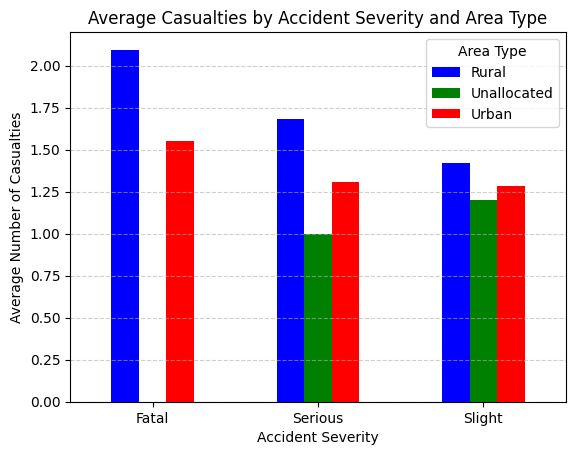

In [32]:
# Grouped Bar Chart: Accident Severity in Urban vs. Rural Areas
severity_by_area = aksidente.groupby(['Accident_Severity', 'Urban_or_Rural_Area'])['Number_of_Casualties'].mean().unstack()

plt.figure(figsize=(10, 6))
severity_by_area.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Casualties by Accident Severity and Area Type')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=0)
plt.legend(title='Area Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h4>It appears that accident severity are greater in Rural than Urban</h4>

<h1 style="font-weight:bold;">Multivariate Analysis with Continuity</h1><h1>In daylight conditions according to the data, how many are the accidents, its average, and the maximum number of accident in various roadtype?</h1>

<h4>Dual carriageways have the highest average number of accidents (1.462943).</h4>

In [33]:
daylight_accidents = aksidente[(aksidente['Light_Conditions'] == 'Daylight')]
daylight_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,9,5,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660672,201091NM01085,Serious,2022-01-29,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2022,1,29,5
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2


In [34]:
count_dual = len(daylight_accidents[daylight_accidents['Road_Type'] == 'Dual carriageway'])
sum_casualties_dual = daylight_accidents[daylight_accidents['Road_Type'] == 'Dual carriageway']['Number_of_Casualties'].sum()
sum_casualties_dual / count_dual

1.4629434841937685

<h4>"Single carriageway" has the highest number of accidents by far, with 363,265.</h4>

In [35]:
daylight_accidents[daylight_accidents['Road_Type'] == 'Single carriageway']['Number_of_Casualties'].count()

363265

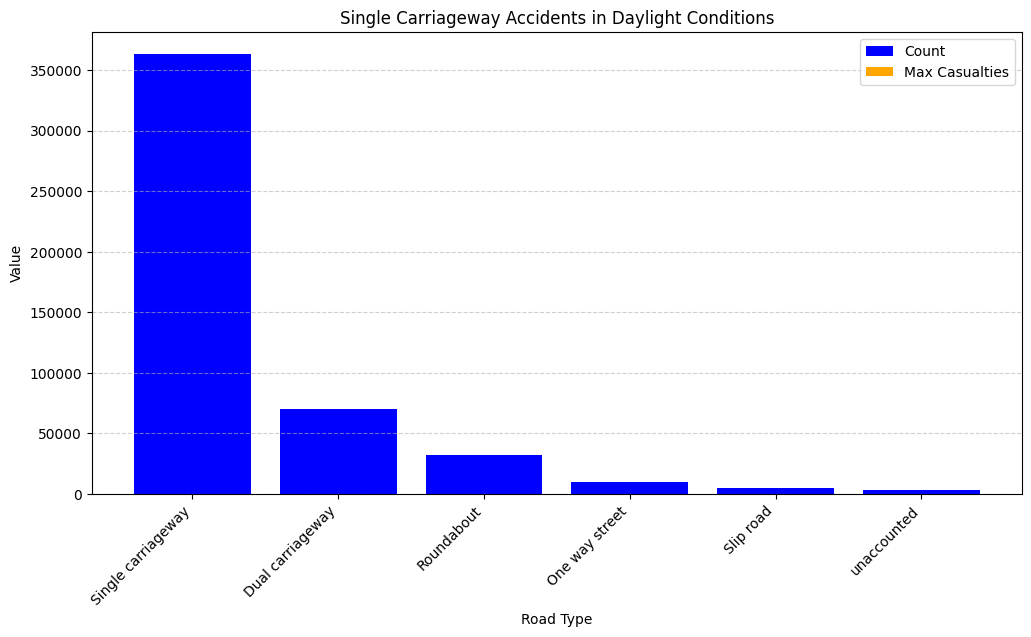

In [36]:
# Bar Chart: Single Carriageway Accidents in Daylight Conditions
road_type_counts = daylight_accidents['Road_Type'].value_counts()
road_type_max = daylight_accidents.groupby('Road_Type')['Number_of_Casualties'].max()

plt.figure(figsize=(12, 6))
plt.bar(road_type_counts.index, road_type_counts.values, color='blue', label='Count')
plt.bar(road_type_max.index, road_type_max.values, color='orange', label='Max Casualties')
plt.title('Single Carriageway Accidents in Daylight Conditions')
plt.xlabel('Road Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h4>Single carriageways also have the highest maximum number of accidents.</h4>

In [37]:
daylight_accidents[daylight_accidents['Road_Type'] == 'Single carriageway']['Number_of_Casualties'].max()

62

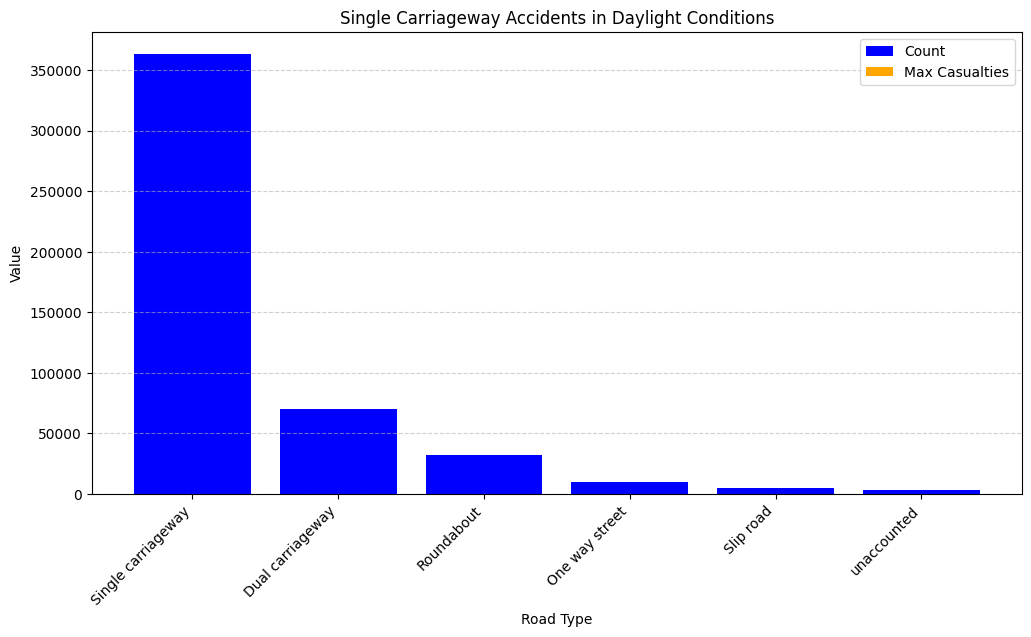

In [38]:
# Bar Chart: Single Carriageway Accidents in Daylight Conditions
road_type_counts = daylight_accidents['Road_Type'].value_counts()
road_type_max = daylight_accidents.groupby('Road_Type')['Number_of_Casualties'].max()

plt.figure(figsize=(12, 6))
plt.bar(road_type_counts.index, road_type_counts.values, color='blue', label='Count')
plt.bar(road_type_max.index, road_type_max.values, color='orange', label='Max Casualties')
plt.title('Single Carriageway Accidents in Daylight Conditions')
plt.xlabel('Road Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [39]:
daylight_accidents = aksidente[aksidente['Light_Conditions'] == 'Daylight']
road_type_casualties = daylight_accidents.groupby('Road_Type')['Number_of_Casualties'].agg(['count', 'mean', 'max'])
road_type_casualties

,count,mean,max
Road_Type,,,
Dual carriageway,70352,1.462943,47
One way street,9964,1.177439,15
Roundabout,32581,1.257604,19
Single carriageway,363265,1.328810,62
Slip road,5249,1.394551,14
unaccounted,3469,1.219948,28


<Figure size 1200x600 with 0 Axes>

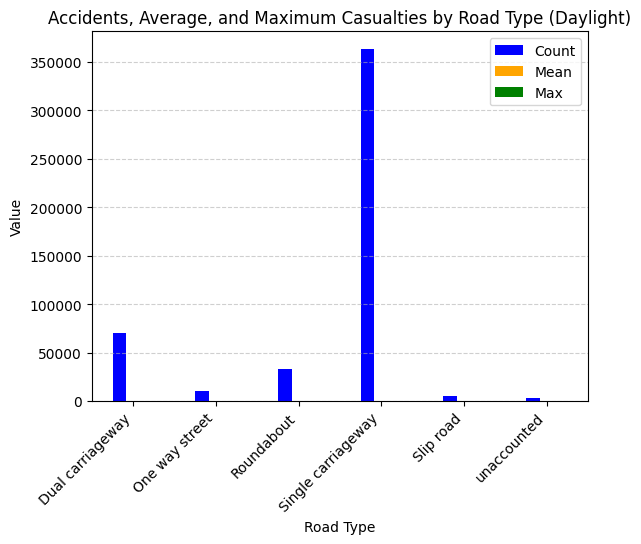

In [40]:
# Grouped Bar Chart: Accidents, Average, and Maximum Casualties by Road Type
road_type_casualties = daylight_accidents.groupby('Road_Type')['Number_of_Casualties'].agg(['count', 'mean', 'max'])

# Plot
plt.figure(figsize=(12, 6))
road_type_casualties.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Accidents, Average, and Maximum Casualties by Road Type (Daylight)')
plt.xlabel('Road Type')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(['Count', 'Mean', 'Max'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h1>------------------------------------------------------------</h1><h1 style="font-weight:bold; background-color: yellow;"> 20 insights </h1>

<h3>#1 Univariate Analysis</h3><h1>WHAT ARE THE TOTAL NUMBER OF ACCIDENTS</h1><h4>There are 660679 total number of accidents</h4>

In [41]:
a = aksidente['Index'].count()
a

660679

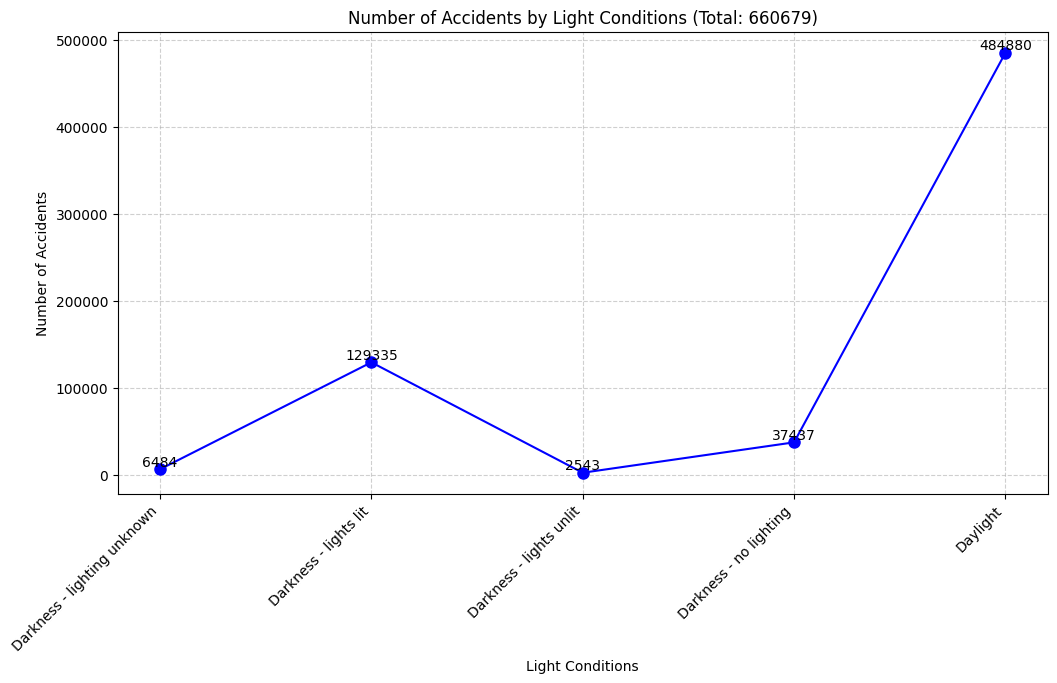

In [42]:
# Line Plot: Accidents by Light Conditions
light_conditions = aksidente['Light_Conditions'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(light_conditions.index, light_conditions.values, marker='o', linestyle='-', color='blue', markersize=8)

plt.title('Number of Accidents by Light Conditions (Total: 660679)')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

for x, y in zip(light_conditions.index, light_conditions.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

<h3>#2 Univariate Analysis</h3><h1>AVERAGE NUMBER OF CASUALTIES PER ACCIDENT</h1><h4>The mean number of casualities is 1.36</h4>

In [43]:
b = aksidente['Number_of_Casualties'].mean()
np.round(b,2)

1.36

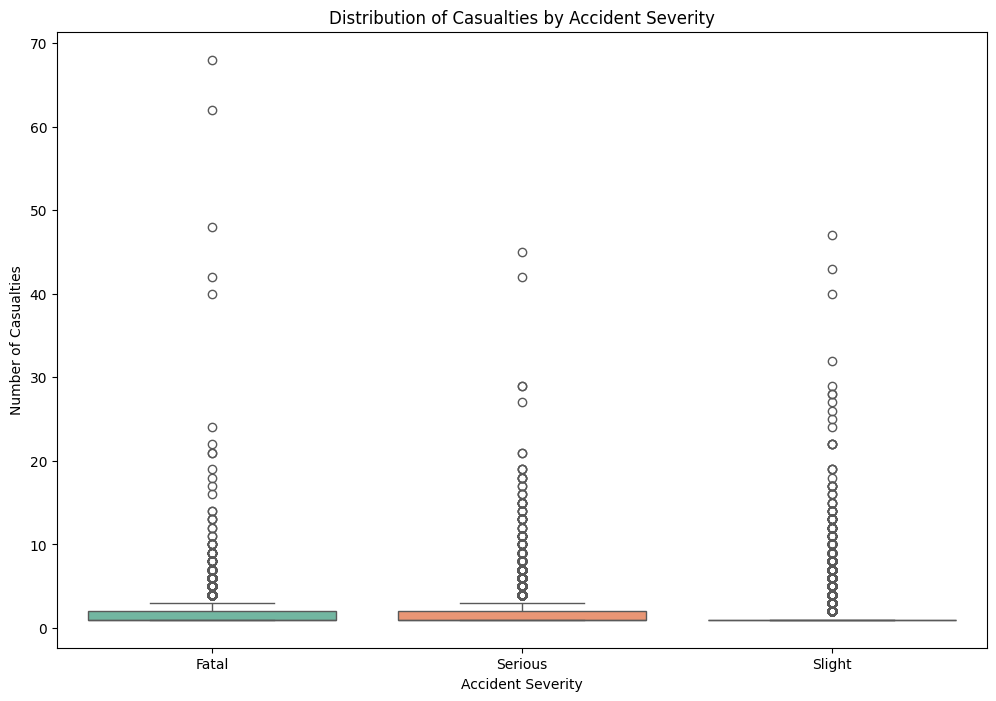

In [44]:
# Boxplot: Casualties by Accident Severity
plt.figure(figsize=(12, 8))
sns.boxplot(data=aksidente, y='Number_of_Casualties', x='Accident_Severity', palette='Set2')
plt.title('Distribution of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.show()

<h3>#3 Univariate Analysis</h3><h1>MOST COMMON ACCIDENT SEVERITY</h1><h4>The most comon accident severity is 'Slight'</h4>

In [45]:
c =aksidente['Accident_Severity'].mode()[0]
c

'Slight'

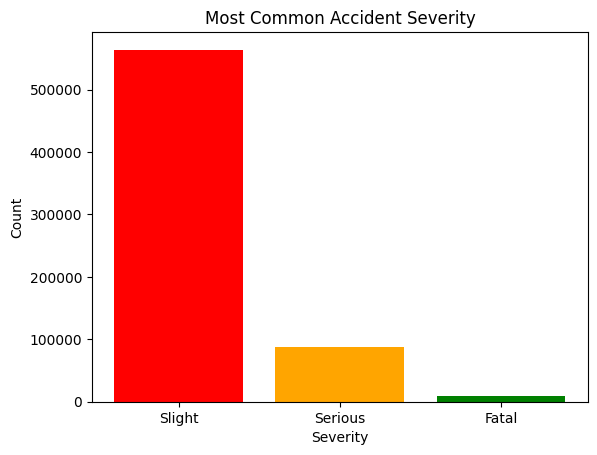

In [46]:
# Bar Chart: Most Common Accident Severity
severity_counts = aksidente['Accident_Severity'].value_counts()
plt.bar(severity_counts.index, severity_counts.values, color=['red', 'orange', 'green'])
plt.title('Most Common Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

<h3>#4 Univariate Analysis</h3><h1>DISTRIBUTION OF ROAD TYPES</h1><h4>The majority of accidents occur on single carriageways (492,143), followed by dual carriageways (99,424), roundabouts (43,992), one-way streets (13,559), slip roads (7,041), and unaccounted (4,520)</h4>

In [47]:
d = aksidente['Road_Type'].value_counts()
d

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

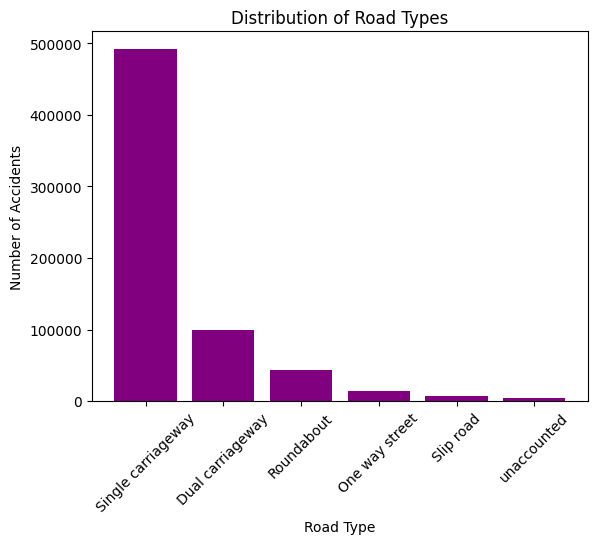

In [48]:
# Bar Chart: Distribution of Road Types
plt.bar(d.index, d.values, color='purple')
plt.title('Distribution of Road Types')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h3>#5 Univariate Analysis</h3><h1>MOST FREQUENT WEATHER CONDITION DURING ACCIDENTS</h1><h4>The most frequent weather condition during accidents is 'Fine no high winds'</h4>

In [49]:
e = aksidente['Weather_Conditions'].mode()[0]
e

'Fine no high winds'

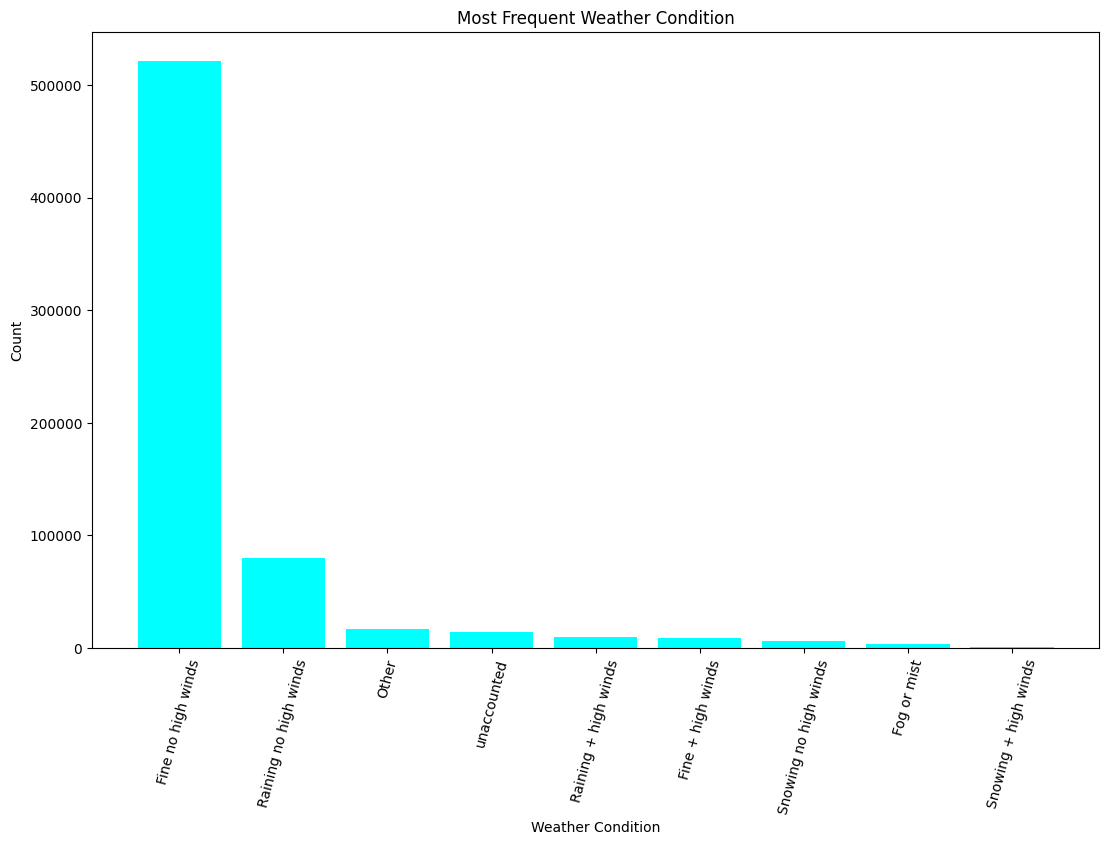

In [50]:
# Bar Chart: Most Frequent Weather Condition
weather_counts = aksidente['Weather_Conditions'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='cyan')
plt.title('Most Frequent Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>#6 Univariate Analysis</h3><h1>AVERAGE NUMBER OF VEHICLES INVOLVED IN ACCIDENTS</h1><h4>The average number of vehicles involved in accidents is 1.83</h4>

In [51]:
f = aksidente['Number_of_Vehicles'].mean()
np.round(f,2)

1.83

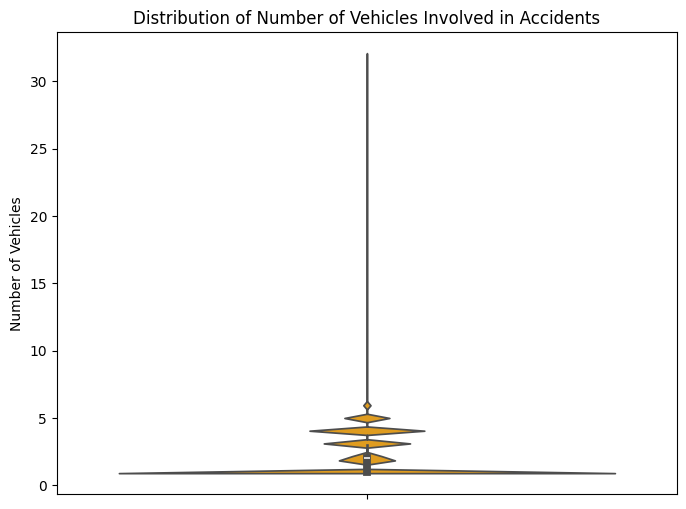

In [52]:
# Violin Plot: Number of Vehicles Involved in Accidents
plt.figure(figsize=(8, 6))
sns.violinplot(y=aksidente['Number_of_Vehicles'], color='orange')
plt.title('Distribution of Number of Vehicles Involved in Accidents')
plt.ylabel('Number of Vehicles')
plt.show()

<h3>#7 Univariate Analysis</h3><h1>PERCENTAGE OF ACCIDENTS IN URBAN VS. RURAL AREAS</h1><h4>Approximately 63.83% of accidents occur in urban areas, 36.17% in rural areas, and a negligible 0.002% in unallocated areas.</h4>

In [53]:
g = aksidente['Urban_or_Rural_Area'].value_counts(normalize=True) * 100
np.round(g,3)

Urban_or_Rural_Area
Urban          63.825
Rural          36.173
Unallocated     0.002
Name: proportion, dtype: float64

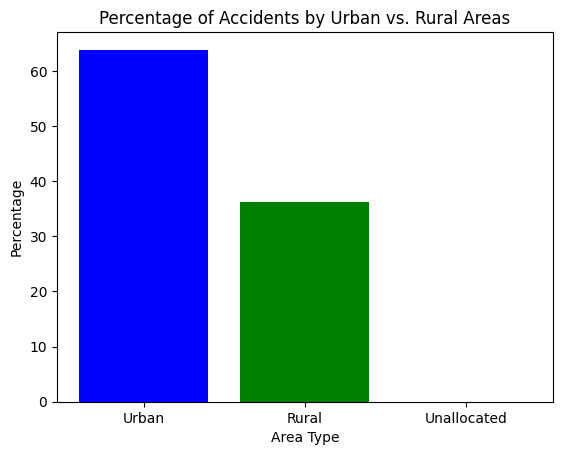

In [54]:
# Bar Chart: Percentage of Accidents by Area Type
plt.bar(g.index, g.values, color=['blue', 'green', 'red'])
plt.title('Percentage of Accidents by Urban vs. Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Percentage')
plt.show()

<h3>#8 Univariate Analysis</h3><h1>MOST COMMON LIGHT CONDITION DURING ACCIDENTS</h1><h4>The most common light condition during accidents is 'Daylight'</h4>

In [55]:
h = aksidente['Light_Conditions'].mode()[0]
h

'Daylight'

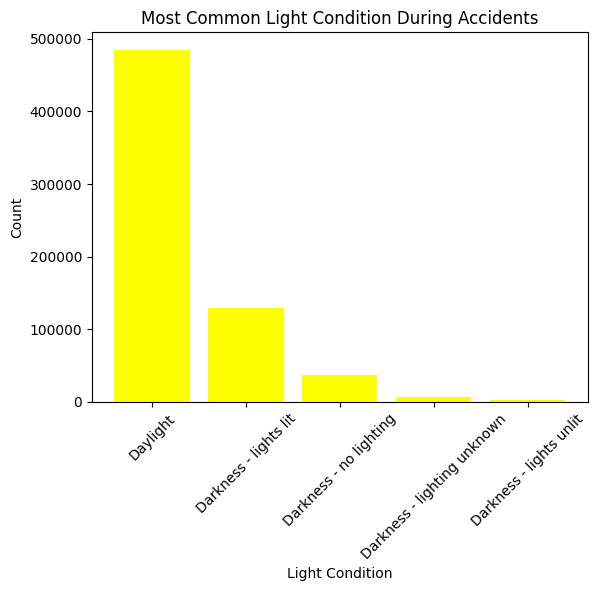

In [56]:
# Bar Chart: Most Common Light Condition
light_counts = aksidente['Light_Conditions'].value_counts()
plt.bar(light_counts.index, light_counts.values, color='yellow')
plt.title('Most Common Light Condition During Accidents')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<h3>#9 Univariate Analysis</h3><h1>DISTRIBUTION OF ROAD SURFACE CONDITIONS</h1><h4>Most accidents occur on dry road surfaces (447,821), followed by wet or damp surfaces (186,708), frost or ice (18,517), snow (5,890), flood over 3cm deep (1,017), and unknown surface conditions (726)</h4>

In [57]:
i = aksidente['Road_Surface_Conditions'].value_counts()
i

Road_Surface_Conditions
Dry                           447821
Wet or damp                   186708
Frost or ice                   18517
Snow                            5890
Flood over 3cm. deep            1017
unknown surface conditions       726
Name: count, dtype: int64

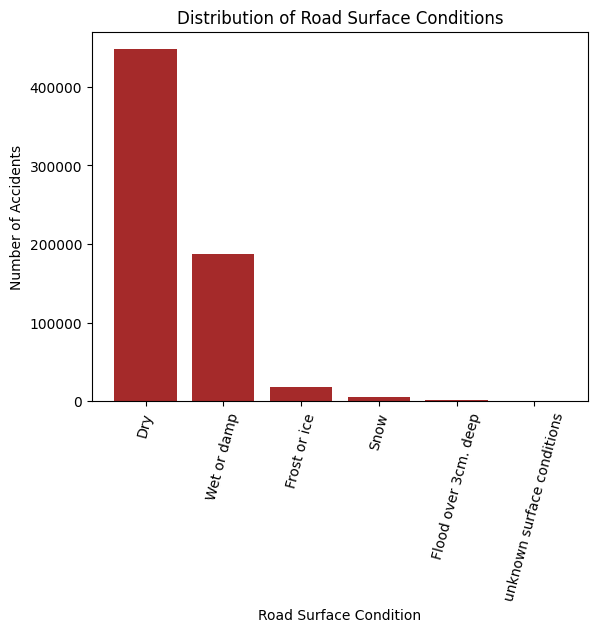

In [58]:
# Bar Chart: Distribution of Road Surface Conditions
plt.bar(i.index, i.values, color='brown')
plt.title('Distribution of Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)
plt.show()

<h3>#10 Univariate Analysis</h3><h1>MOST COMMON VEHICLE TYPE INVOLVED IN ACCIDENTS</h1><h4>The most common vehicle type involved in accidents is 'Car'</h4>

In [59]:
j = aksidente['Vehicle_Type'].mode()[0]
j

'Car'

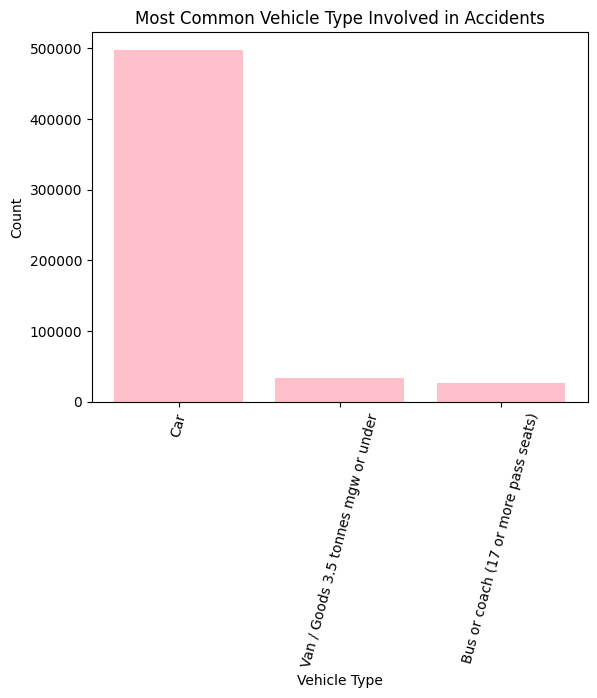

In [60]:
# Bar Chart: Most Common Vehicle Type
vehicle_counts = aksidente['Vehicle_Type'].value_counts().head(3)
plt.bar(vehicle_counts.index, vehicle_counts.values, color='pink')
plt.title('Most Common Vehicle Type Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

<h3>#11  Univariate Analysis</h3><h1>AVERAGE NUMBER OF CASUALTIES BY ACCIDENT SEVERITY</h1><h4>Fatal accidents have the highest average number of casualties (1.90), followed by serious accidents (1.47) and slight accidents (1.33).</h4>

In [61]:
k = aksidente.groupby('Accident_Severity')['Number_of_Casualties'].mean()
np.round(k,2)

Accident_Severity
Fatal      1.90
Serious    1.47
Slight     1.33
Name: Number_of_Casualties, dtype: float64

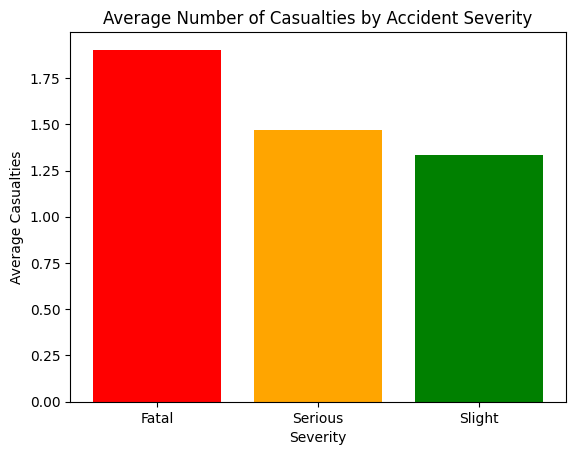

In [62]:
# Bar Chart: Average Casualties by Severity
plt.bar(k.index, k.values, color=['red', 'orange', 'green'])
plt.title('Average Number of Casualties by Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Average Casualties')
plt.show()

<h3>#12 Univariate Analysis</h3><h1>TOP 5 NUMBER OF ACCIDENTS BY DISTRICT AREA</h1><h4>Birmingham has the highest number of accidents (13,491), followed by Leeds (8,898), Manchester (6,720), Bradford (6,212), and Sheffield (5,710)</h4>

In [63]:
l = aksidente['District Area'].value_counts().head()
l

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

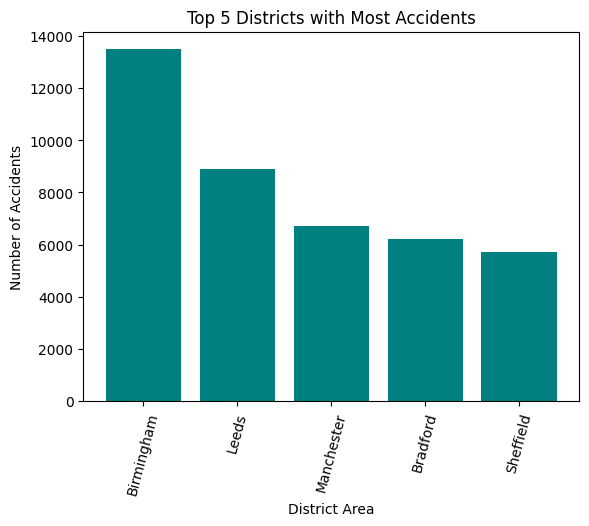

In [64]:
# Bar Chart: Top 5 Districts with Most Accidents
plt.bar(l.index, l.values, color='teal')
plt.title('Top 5 Districts with Most Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)
plt.show()

<h3>#13 Univariate Analysis</h3><h1>CORRELATION BETWEEN NUMBER OF VEHICLES AND NUMBER OF CASUALTIES</h1><h4>There is no correlation between the number of vehicles and the number of casualties</h4>

In [65]:
m = aksidente['Number_of_Vehicles'].corr(aksidente['Number_of_Casualties']) > 0.5
m

False

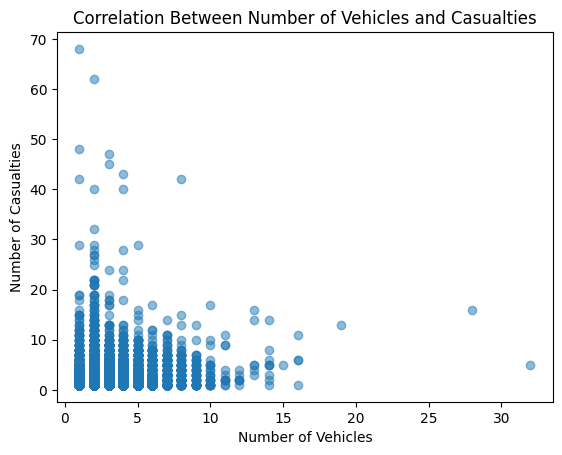

In [66]:
# Scatter Plot: Correlation Between Vehicles and Casualties
plt.scatter(aksidente['Number_of_Vehicles'], aksidente['Number_of_Casualties'], alpha=0.5)
plt.title('Correlation Between Number of Vehicles and Casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.show()

<h3>#14 Univariate Analysis</h3><h1>AVERAGE NUMBER OF CASUALTIES IN URBAN VS. RURAL AREAS</h1><h4>Rural areas have a slightly higher average number of casualties per accident (1.48) compared to urban areas (1.29). Unallocated areas have an average of 1.18 casualties per accident.</h4>

In [67]:
n = aksidente.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()
np.round(n,2)

Urban_or_Rural_Area
Rural          1.48
Unallocated    1.18
Urban          1.29
Name: Number_of_Casualties, dtype: float64

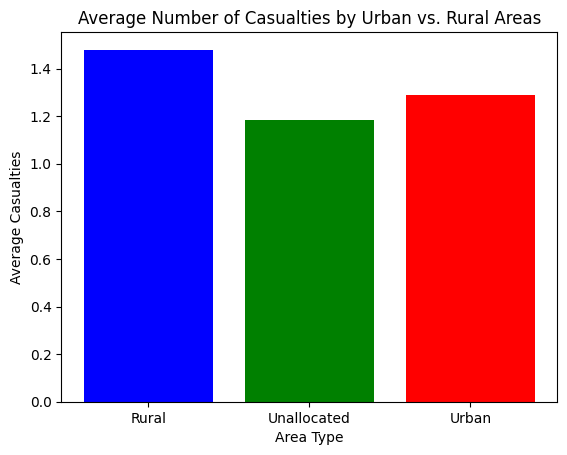

In [68]:
# Bar Chart: Average Casualties by Area Type
plt.bar(n.index, n.values, color=['blue', 'green', 'red'])
plt.title('Average Number of Casualties by Urban vs. Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Average Casualties')
plt.show()

<h3>#15 Univariate Analysis</h3><h1>MOST COMMON ROAD TYPE FOR EACH ACCIDENT SEVERITY</h1><h4>Single carriageways are the most common road type for all accident severities: fatal (6,527), serious (70,059), and slight (415,557)</h4>

In [69]:
o = aksidente.groupby(['Accident_Severity', 'Road_Type']).size().unstack()
o

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Accident_Severity,,,,,,
Fatal,1815,95,142,6527,49,33
Serious,11746,1655,3665,70059,611,481
Slight,85863,11809,40185,415557,6381,4006


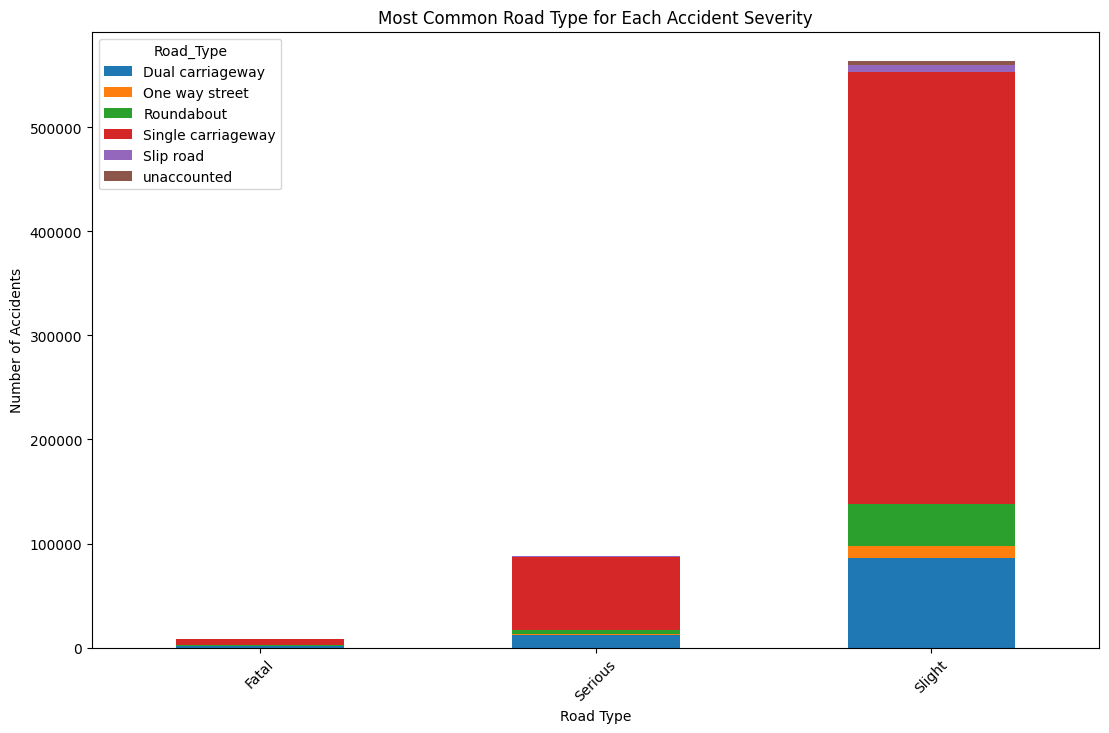

In [70]:
# Stacked Bar Chart: Road Type by Accident Severity
o.plot(kind='bar', stacked=True)
plt.title('Most Common Road Type for Each Accident Severity')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3>#16 Univariate Analysis</h3><h1>NUMBER OF ACCIDENTS BY WEATHER CONDITIONS</h1><h4>The majority of accidents occur during "Fine no high winds" (520,885), followed by "Raining no high winds" (79,696), and "Other" conditions (17,150)</h4>

In [71]:
p = aksidente['Weather_Conditions'].value_counts()
p

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

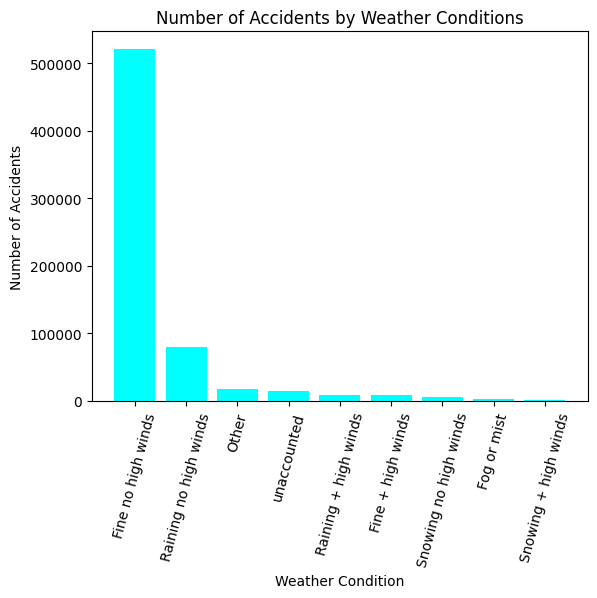

In [72]:
# Bar Chart: Number of Accidents by Weather Conditions
plt.bar(p.index, p.values, color='cyan')
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)
plt.show()

<h3>#17 Bivariate Analysis</h3><h1>AVERAGE NUMBER OF VEHICLES INVOLVED IN ACCIDENTS BY ROAD SURFACE CONDITION</h1><h4>Accidents on dry roads involve the highest average number of vehicles (1.84), followed by wet or damp roads roads (1.83), snow (1.75), unknown surface conditions (1.74), frost or ice (1.64), and flood over 3cm deep (1.61).</h4>

In [73]:
q = aksidente.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean()
np.round(q,2)

Road_Surface_Conditions
Dry                           1.84
Flood over 3cm. deep          1.61
Frost or ice                  1.64
Snow                          1.75
Wet or damp                   1.83
unknown surface conditions    1.74
Name: Number_of_Vehicles, dtype: float64

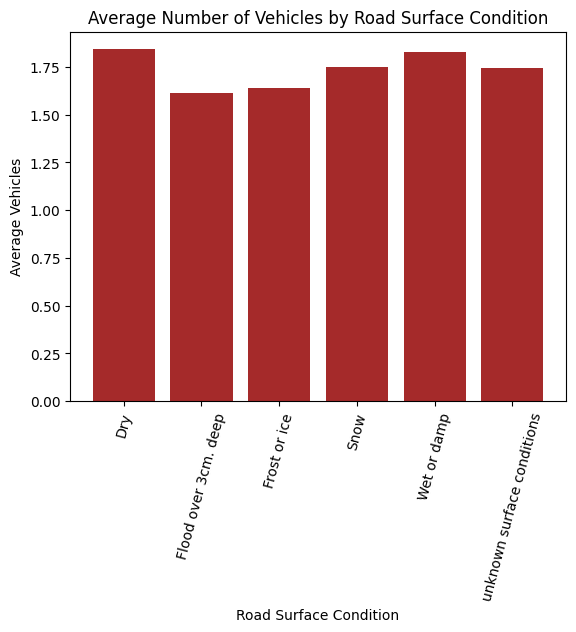

In [74]:
# Bar Chart: Average Vehicles by Road Surface Condition
plt.bar(q.index, q.values, color='brown')
plt.title('Average Number of Vehicles by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('Average Vehicles')
plt.xticks(rotation=75)
plt.show()

<h3>#18 Bivariate Analysis</h3><h1>RANKING OF ACCIDENT SEVERITY DISTRIBUTION BY LIGHT CONDITIONS</h1><h4>Accidents in daylight have the highest severity (rank 1.0), darkness with lights lit (rank 2.0), darkness with no lighting (rank 3.0), and darkness with unknown lighting (rank 4.0), while those in darkness with unlit lights have the lowest severity (rank 5.0)</h4>

In [75]:
r = aksidente.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack()
r.rank(ascending=False)

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,4.0,4.0,4.0
Darkness - lights lit,2.0,2.0,2.0
Darkness - lights unlit,5.0,5.0,5.0
Darkness - no lighting,3.0,3.0,3.0
Daylight,1.0,1.0,1.0


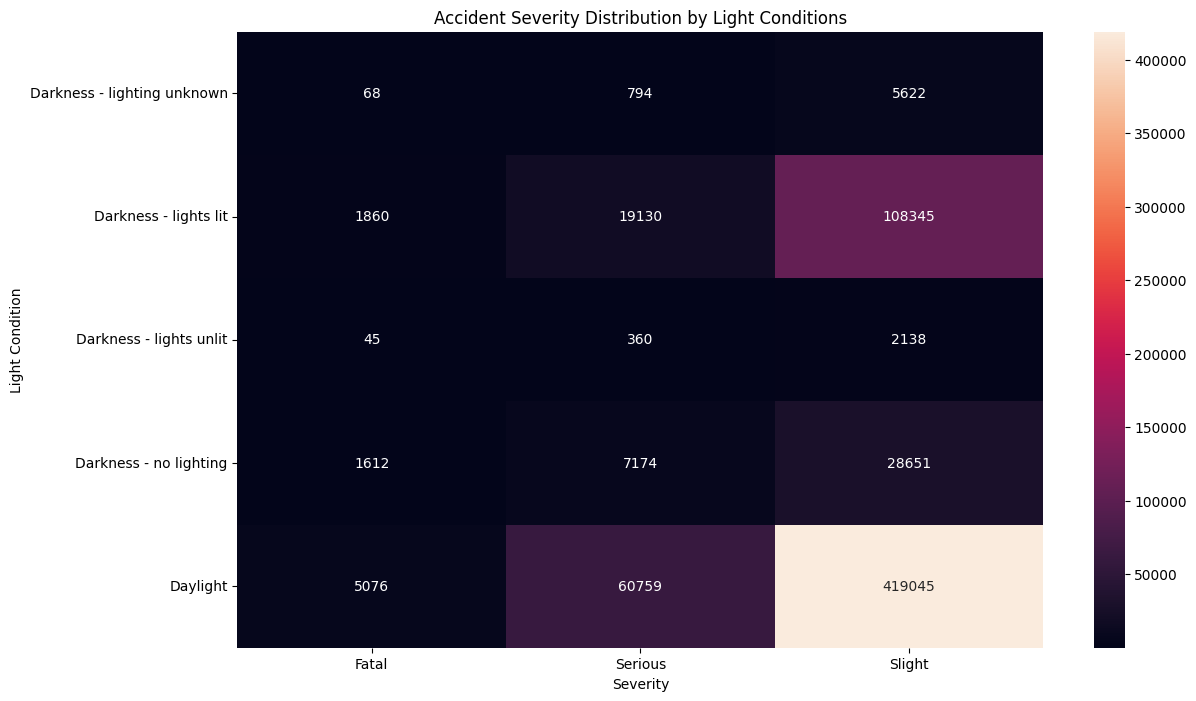

In [76]:
# Heatmap: Accident Severity by Light Conditions
sns.heatmap(r, annot=True, fmt='g')
plt.title('Accident Severity Distribution by Light Conditions')
plt.xlabel('Severity')
plt.ylabel('Light Condition')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3>#19 Multivariate Analysis</h3><h1>AVERAGE NUMBER OF CASUALTIES BY ROAD TYPE AND WEATHER CONDITIONS</h1><h4>The average number of casualties by road type and weather conditions indicates that dual carriageways have the highest average casualties in fog or mist (1.67), while one-way streets have the lowest average casualties in snowing with high winds (1.07). Other notable averages with high records include roundabouts in snowing with high winds (1.53), single carriageways in snow with high winds (1.43), and slip roads in raining with no high winds (1.48)</h4>

In [77]:
s = aksidente.groupby(['Road_Type', 'Weather_Conditions'])['Number_of_Casualties'].mean().unstack()
np.round(s,2)

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Road_Type,,,,,,,,,
Dual carriageway,1.44,1.48,1.67,1.43,1.48,1.50,1.39,1.40,1.33
One way street,1.18,1.19,1.24,1.23,1.31,1.24,1.07,1.23,1.14
Roundabout,1.33,1.27,1.32,1.27,1.25,1.29,1.53,1.32,1.23
Single carriageway,1.38,1.34,1.41,1.35,1.42,1.40,1.43,1.33,1.22
Slip road,1.36,1.42,1.39,1.46,1.43,1.48,1.30,1.23,1.29
unaccounted,1.18,1.25,1.52,1.17,1.32,1.31,2.00,1.40,1.22


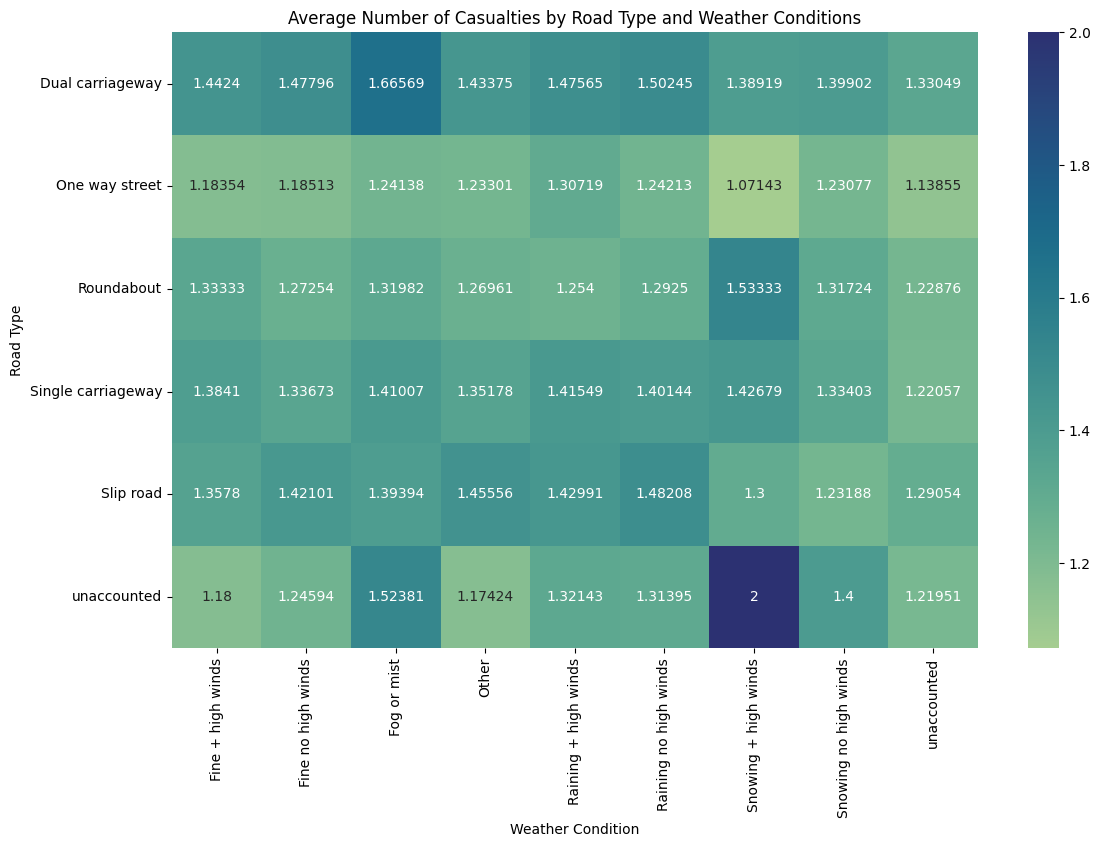

In [78]:
# Heatmap: Casualties by Road Type and Weather Conditions
sns.heatmap(s, cmap='crest', annot=True, fmt='g')
plt.title('Average Number of Casualties by Road Type and Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Road Type')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3>#20 Multivariate Analysis</h3><h1>NUMBER OF ACCIDENTS BY DISTRICT AREA AND ACCIDENT SEVERITY</h1><h4>The number of accidents by district area and accident severity shows that York has the highest number of slight accidents (1,621), while Alnwick has the lowest number of fatal accidents (6). Other notable figures include Aberdeen City with 12 fatal accidents, Aberdeenshire with 463 serious accidents, and Wycombe with 1,493 slight accidents</h4>

In [79]:
t = aksidente.groupby(['District Area', 'Accident_Severity'])['Number_of_Casualties'].size().unstack()
t

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


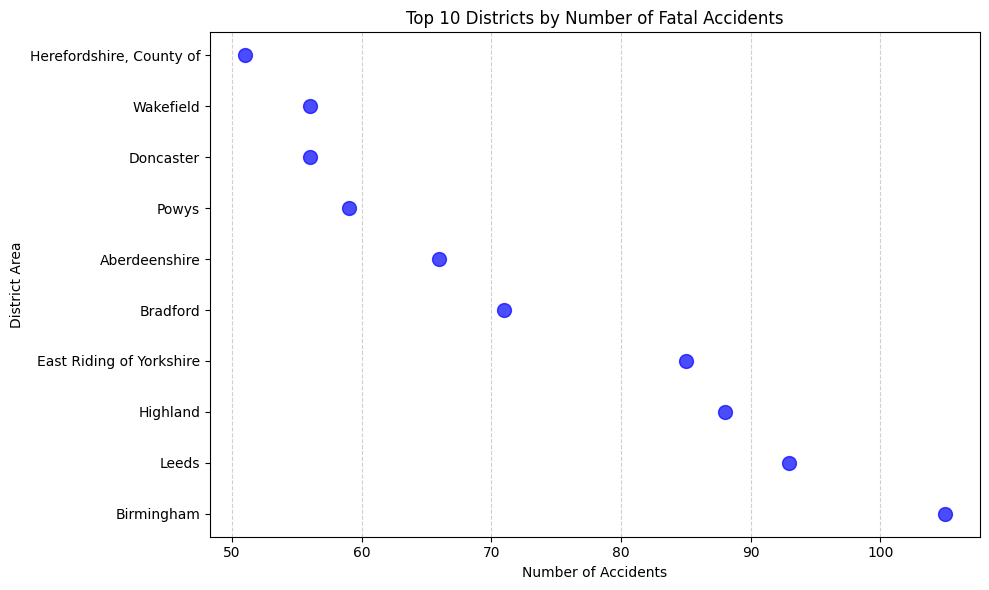

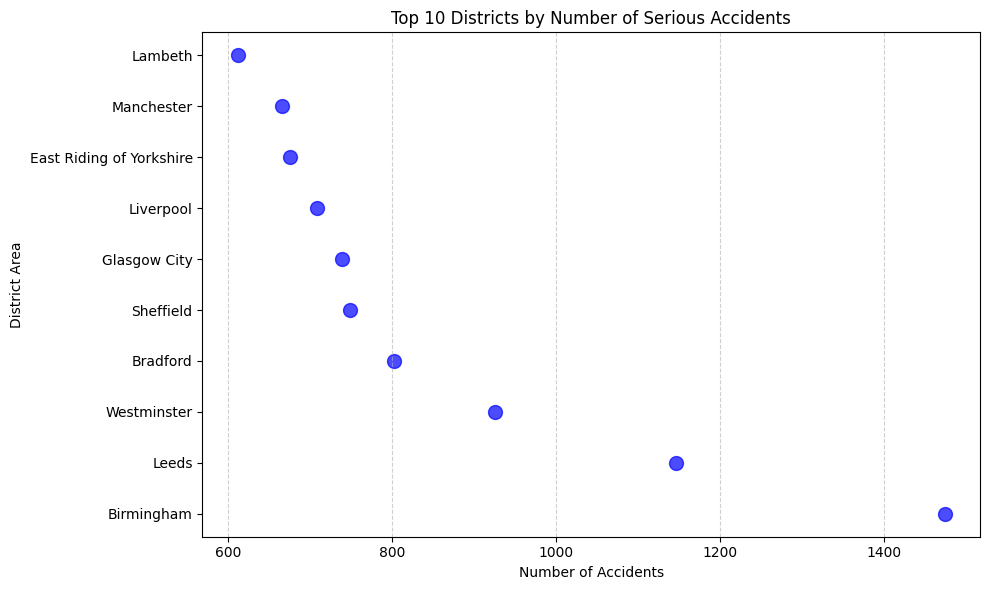

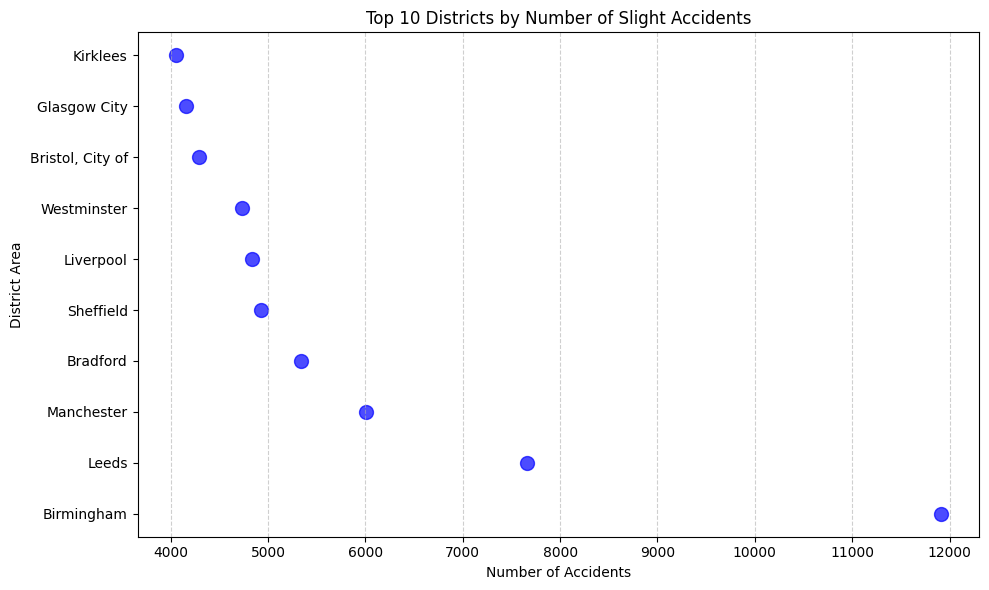

In [80]:
# Plot top 10 for each severity level separately
for severity in t.columns:
    top_n = 10
    t_sorted = t.nlargest(top_n, severity)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(t_sorted[severity], t_sorted.index, s=100, alpha=0.7, color='blue')
    plt.title(f'Top 10 Districts by Number of {severity} Accidents')
    plt.xlabel('Number of Accidents')
    plt.ylabel('District Area')
    plt.subplots_adjust(left=0.3)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

<h1>------------------------------------------------------------</h1><h1>Activity 4 <h4>(Other Examples)</h4></h1>

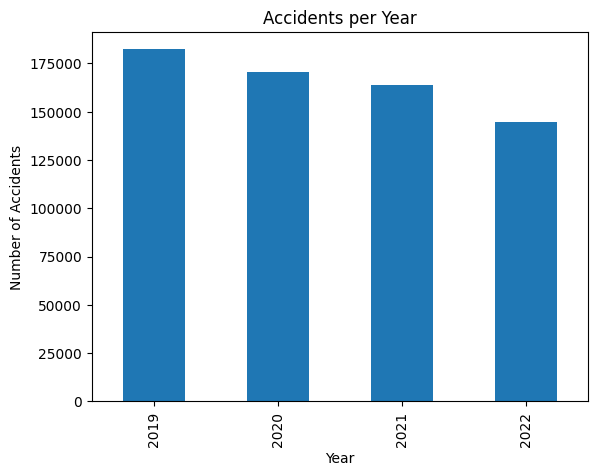

In [81]:
accidents_per_year = aksidente['Year'].value_counts().sort_index()
accidents_per_month = aksidente['Month'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# month_names={1:

In [82]:
df_2019 = aksidente[aksidente['Year'] == 2019]
df_2019.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [83]:
new_df = df_2019[df_2019['Accident_Severity'] != 'Slight']
visual1 = new_df.groupby(['Urban_or_Rural_Area','Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
visual1

,Urban_or_Rural_Area,Accident_Severity,Number_of_Casualties
0,Rural,Fatal,3844
1,Rural,Serious,17502
2,Rural,Slight,0
3,Unallocated,Fatal,0
4,Unallocated,Serious,0
5,Unallocated,Slight,0
6,Urban,Fatal,1507
7,Urban,Serious,18594
8,Urban,Slight,0


<h1>Bar Graph</h1><h4 style="font-weight:bold; background-color: yellow;">plt.bar(x,y)</h4>

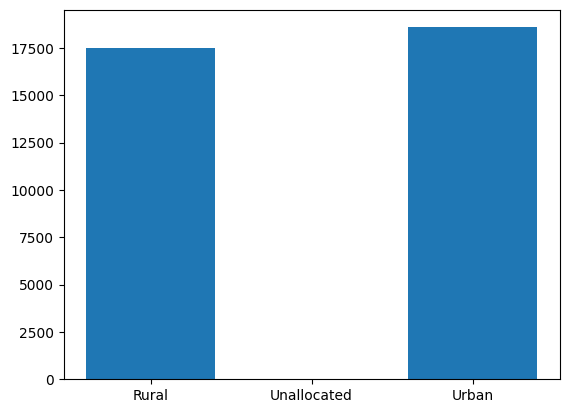

In [84]:
x = visual1['Urban_or_Rural_Area']
y = visual1['Number_of_Casualties']

plt.bar(x,y)
plt.show()

<h1>Bar Graph</h1><h4 style="font-weight:bold; background-color: yellow;">plt.plot(kind='bar', stacked=True)</h4>

<h1>Seasonal Analysis</h1>

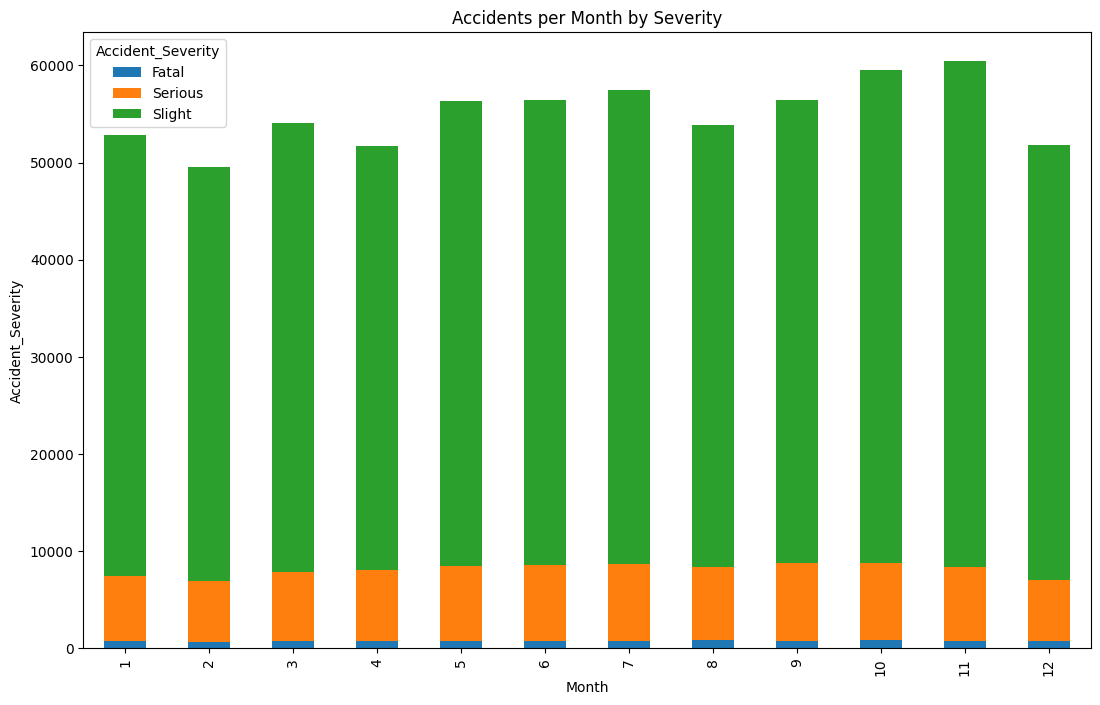

In [85]:
accident_per_month_severity=aksidente.groupby(['Month','Accident_Severity']).size().unstack().fillna(0)

accident_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(13,8)
plt.show()

In [86]:
area_year=aksidente.groupby(['District Area','Year']).size().reset_index(name = 'Accident_Count')

area_year

pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count' )
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


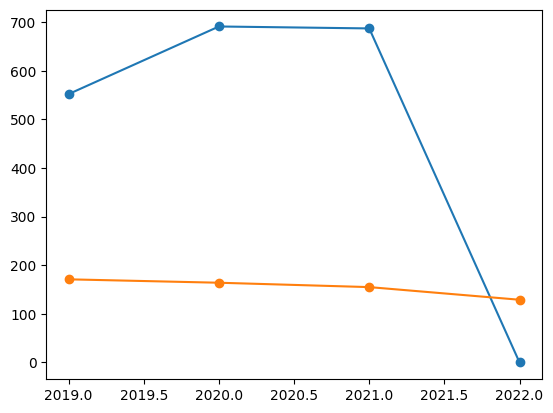

In [87]:
plt.plot(pivot_table.index,pivot_table['Aberdeenshire'], label = 'Adur', marker='o')
plt.plot(pivot_table.index,pivot_table['Adur'], label = 'Adur', marker='o')
# plt.plot()
plt.show()

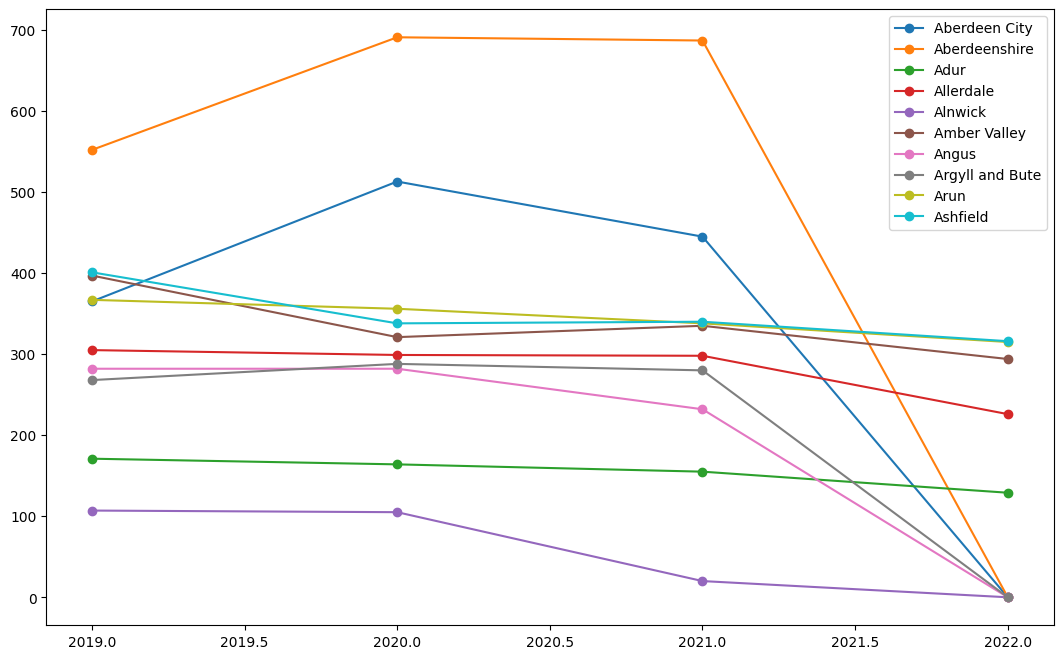

In [88]:
count = 0
for x in pivot_table:
    count +=1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='o')
    if count == 10:
        break
plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

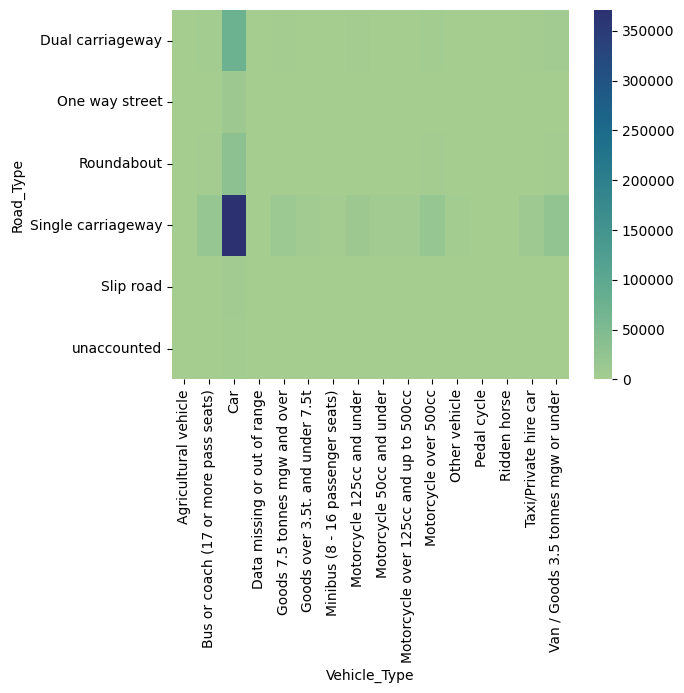

In [89]:
# Visualizing Correlation
# car_road = aksidente.groupby(['Road_Type'])['Number_of_Casualties'].mean()

# car_road

type_vh = aksidente.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()
sns.heatmap(type_vh, cmap='crest')
plt.show()